In [ ]:
# this is for cleaning the data.
import pandas as pd

# Replace 'your_file.csv' with the actual path to your CSV file
file_path = 'USA_Housing.csv'

# Load data into a pandas DataFrame
data = pd.read_csv(file_path)

null_values = data.isnull().sum()

# Display the count of null values for each column
print("Null values in each column:")
print(null_values)

import numpy as np

import math
# Replace 'column_name' with the actual column name for which you want to calculate the ceiling


# Apply lambda function to calculate ceiling for the specified column
data['Price'] = data['Price'].apply(lambda x: math.ceil(x))

# Display the DataFrame with the new column
#print(data.head())

# List of columns for which you want to calculate the floor
floor_column_name = ['Avg. Area Income','Avg. Area House Age','Avg. Area Number of Rooms','Avg. Area Number of Bedrooms','Area Population']

# Apply floor function to all specified columns using applymap
data[floor_column_name] = data[floor_column_name].applymap(lambda x: math.floor(x))
# Display the DataFrame with the new column
print(data.head())

output_file_path = 'Cleansed_USA_Housing.csv'
data.to_csv(output_file_path, index=False)


Null values in each column:
Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64
   Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0             79545                    5                          7   
1             79248                    6                          6   
2             61287                    5                          8   
3             63345                    7                          5   
4             59982                    5                          7   

   Avg. Area Number of Bedrooms  Area Population    Price  \
0                             4            23086  1059034   
1                             3            40173  1505891   
2                             5            36882  1058988   
3                             3            34310  

<ipython-input-5-364a5cb405ac>:14: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True, fmt=".2f", cmap="YlGnBu")


      Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
1303             68091                    5                          7   
1051             75729                    5                          7   
4904             70885                    6                          7   
931              73386                    4                          7   
4976             75046                    5                          7   
...                ...                  ...                        ...   
4171             56610                    4                          7   
599              70596                    6                          6   
1361             55621                    3                          6   
1547             63044                    5                          5   
4959             75078                    7                          8   

      Avg. Area Number of Bedrooms  Area Population  
1303                             3            44557  
105

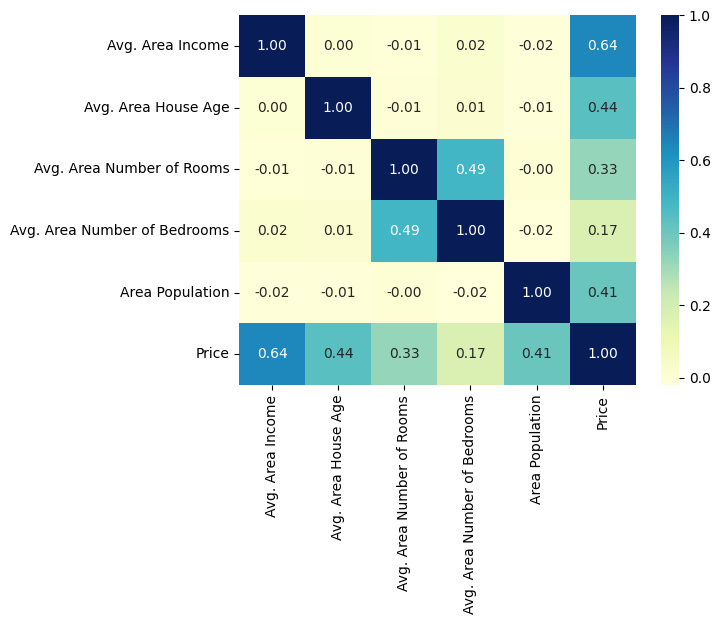

In [5]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# this is for plotting
import pandas as pd
import statsmodels.api as sm
import seaborn as sns

# Replace 'your_file.csv' with the actual path to your CSV file
file_path = 'Cleansed_USA_Housing.csv'

# Load data into a pandas DataFrame
data = pd.read_csv(file_path)
sns.heatmap(data.corr(),annot=True, fmt=".2f", cmap="YlGnBu")
# Specify independent variables (features) and the dependent variable (target)
# Replace 'independent_var1', 'independent_var2', ..., 'dependent_var' with your column names
independent_vars = data[['Avg. Area Income', 'Avg. Area Number of Rooms']] #the Adj. R-squared:0.51
#independent_vars = data[['Avg. Area Income', 'Avg. Area House Age']] #the Adj. R-squared:0.6
#independent_vars = data[['Avg. Area Income','Avg. Area House Age','Avg. Area Number of Rooms','Avg. Area Number of Bedrooms','Area Population']] #the Adj. R-squared:0.893

dependent_var = data['Price']

#independent_vars = data[['Avg. Area Income', 'Avg. Area Number of Rooms']] #the Adj. R-squared:0.51
#independent_vars = data[['Avg. Area Income', 'Avg. Area House Age']] #the Adj. R-squared:0.6
independent_vars = data[['Avg. Area Income','Avg. Area House Age','Avg. Area Number of Rooms','Avg. Area Number of Bedrooms','Area Population']] #the Adj. R-squared:0.893

dependent_var = data['Price']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(independent_vars, dependent_var, test_size=0.4, random_state=101)
print(X_train)

# Add a constant term to the independent variables matrix
independent_vars = sm.add_constant(independent_vars)

# Create an OLS model
#ols_model = sm.OLS(dependent_var, independent_vars)
ols_model = sm.OLS(y_train, X_train)

# Fit the model
ols_results = ols_model.fit()

# Make predictions on the test set
y_pred = ols_results.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display evaluation metrics
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')
print(ols_results.summary())